In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import re
import sklearn
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/BabbarGaurav/Home-Price-Prediction/main/house-price-prediciton-bengaluru.ipynb")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df2 = df1.drop(['area_type', 'availability', 'society'], axis=1)

In [4]:
df3=df2.dropna()

In [5]:
df4 = df3.copy()

In [6]:
df4

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [7]:
df4['bhk'] = df4['size'].str.extract('(\d+)', expand=False).astype(int)

In [8]:
Q1 = df4['bath'].quantile(0.25)
Q3 = df4['bath'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df5 = df4[(df4['bath'] >= lower_bound) & (df4['bath'] <= upper_bound)]

In [9]:
df5

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,1.0,38.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [10]:
# Define a function to categorize values
def categorize_value(value):
    if isinstance(value, str):
        if value.isnumeric():
            return 'Number'
        elif any(char.isalpha() for char in value if char != ' '):  # Check if the value contains any non-numeric characters
            return 'Text'
        elif re.match(r'^\d+\s*-\s*\d+$', value):  # Check if the value is in range format
            return 'Range'
        else:
            return 'Special Characters'
    else:
        return 'Unknown'

# Create a new categorical column based on the categorization
df5['total_sqft_category'] = df5['total_sqft'].apply(categorize_value)


/var/folders/23/g32wj_kd6rz1jrnj5vp9fzkh0000gn/T/ipykernel_3679/3515286769.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['total_sqft_category'] = df5['total_sqft'].apply(categorize_value)


In [11]:
df5['total_sqft_category'].value_counts()

Number                11637
Range                   118
Special Characters       83
Text                     35
Name: total_sqft_category, dtype: int64

In [12]:
df6 = df5.copy()

In [13]:
for index, row in df6.iterrows():
    if row['total_sqft_category'] == 'Range':
        total_sqft = row['total_sqft'].replace(' ', '')
        start, end = total_sqft.split('-')
        mean_value = (float(start) + float(end)) / 2
        df6.at[index, 'total_sqft'] = mean_value

df6['total_sqft'] = pd.to_numeric(df6['total_sqft'], errors='coerce')

In [14]:
df6

,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_category
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,Number
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,Number
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,Number
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,Number
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,Number
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,Number
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,Number
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,Number
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,Number


In [15]:
df7=df6.dropna()

In [16]:
df7

,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_category
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,Number
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,Number
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,Number
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,Number
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,Number
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,Number
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,Number
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,Number
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,Number


In [17]:
# location = df7.groupby('location').size().sort_values(ascending = False).reset_index(name='count')

In [18]:
# others = location[location['count'] <= 9]['location']
# others

In [19]:
#df7.loc[df7['location'].isin(others), 'location'] = 'other'

In [20]:
df8 = df7.copy()

In [21]:
df8['total_sqft_per_br'] = df8['total_sqft']/df8['bhk']

In [22]:
df8['price_per_sqft'] = (df8['price']*100000/df8['total_sqft']).round(2)

In [23]:
df8

,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_category,total_sqft_per_br,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,Number,528.000000,3699.81
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,Number,480.000000,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,Number,507.000000,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,Number,600.000000,4250.00
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,Number,585.000000,3247.86
...,...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,Number,571.666667,6530.61
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,Number,690.600000,6689.83
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,Number,570.500000,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,Number,1172.250000,10407.34


In [24]:
# Calculate IQR for each column
Q1_ts = df8['total_sqft_per_br'].quantile(0.25)
Q3_ts = df8['total_sqft_per_br'].quantile(0.75)
IQR_ts = Q3_ts - Q1_ts

# Define upper and lower bounds
lower_bound_ts = Q1_ts - 1.5 * IQR_ts
upper_bound_ts = Q3_ts + 1.5 * IQR_ts

# Filter rows within bounds for all columns
df9 = df8[~((df8['total_sqft_per_br'] < lower_bound_ts) | (df8['total_sqft_per_br'] > upper_bound_ts))]

In [25]:
df9

,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_category,total_sqft_per_br,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,Number,528.000000,3699.81
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,Number,480.000000,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,Number,507.000000,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,Number,600.000000,4250.00
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,Number,585.000000,3247.86
...,...,...,...,...,...,...,...,...,...,...
13313,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.00,3,Number,448.333333,4237.92
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,Number,571.666667,6530.61
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,Number,690.600000,6689.83
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,Number,570.500000,5258.55


In [26]:
df9['total_sqft_per_br'].describe()

count    10953.000000
mean       547.888091
std        101.882376
min        272.500000
25%        483.333333
50%        550.000000
75%        608.000000
max        825.333333
Name: total_sqft_per_br, dtype: float64

In [27]:
df9['delta_bath_bedroom'] = df9['bath']-df9['bhk']

/var/folders/23/g32wj_kd6rz1jrnj5vp9fzkh0000gn/T/ipykernel_3679/427207441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['delta_bath_bedroom'] = df9['bath']-df9['bhk']


In [28]:
df10 = df9[(df9['delta_bath_bedroom'] > -2) & (df9['delta_bath_bedroom'] < 1)]

In [29]:
df10['location'].value_counts()

Whitefield           418
Sarjapur  Road       310
Electronic City      297
Kanakpura Road       250
Thanisandra          204
                    ... 
Sadduguntepalya        1
Shirdi Sai Nagar       1
S R Layout             1
Maruthi Extension      1
Abshot Layout          1
Name: location, Length: 1085, dtype: int64

In [30]:
df10

,location,size,total_sqft,bath,balcony,price,bhk,total_sqft_category,total_sqft_per_br,price_per_sqft,delta_bath_bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,Number,528.000000,3699.81,0.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,Number,480.000000,4305.56,-1.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,Number,507.000000,6245.89,0.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,Number,600.000000,4250.00,0.0
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,Number,585.000000,3247.86,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13313,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.00,3,Number,448.333333,4237.92,-1.0
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,Number,571.666667,6530.61,0.0
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,Number,690.600000,6689.83,-1.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,Number,570.500000,5258.55,0.0


In [31]:
df11 = df10.drop(['size', 'total_sqft_category', 'delta_bath_bedroom'], axis=1)

In [32]:
df11['location'].value_counts()

Whitefield           418
Sarjapur  Road       310
Electronic City      297
Kanakpura Road       250
Thanisandra          204
                    ... 
Sadduguntepalya        1
Shirdi Sai Nagar       1
S R Layout             1
Maruthi Extension      1
Abshot Layout          1
Name: location, Length: 1085, dtype: int64

In [33]:
df11['price_per_sqft'].describe()

count     10591.000000
mean       5791.660830
std        3517.677798
min         500.000000
25%        4108.935000
50%        5081.430000
75%        6443.990000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [34]:
# Calculate IQR for each column
Q1_ppst = df11['price_per_sqft'].quantile(0.25)
Q3_ppst = df11['price_per_sqft'].quantile(0.75)
IQR_ppst = Q3_ppst - Q1_ppst

# Define upper and lower bounds
lower_bound_ppst = Q1_ppst - 1 * IQR_ppst
upper_bound_ppst = Q3_ppst + 1 * IQR_ppst

# Filter rows within bounds for all columns
df12 = df11[~((df11['price_per_sqft'] < lower_bound_ppst) | (df11['price_per_sqft'] > upper_bound_ppst))]

In [35]:
df12

,location,total_sqft,bath,balcony,price,bhk,total_sqft_per_br,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,528.000000,3699.81
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,480.000000,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,507.000000,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,600.000000,4250.00
5,Whitefield,1170.0,2.0,1.0,38.00,2,585.000000,3247.86
...,...,...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,1.0,57.00,3,448.333333,4237.92
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,571.666667,6530.61
13315,Whitefield,3453.0,4.0,0.0,231.00,5,690.600000,6689.83
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,570.500000,5258.55


In [36]:
df12['price_per_sqft'].describe()

count    9673.000000
mean     5080.583990
std      1386.600297
min      1875.000000
25%      4008.820000
50%      4936.010000
75%      6000.000000
max      8777.780000
Name: price_per_sqft, dtype: float64

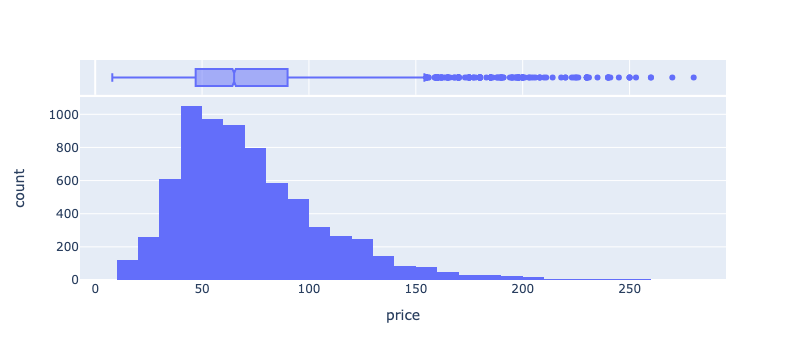

In [89]:
fig1 = px.histogram(df14, x= 'price', nbins = 50, marginal = 'box')
fig1

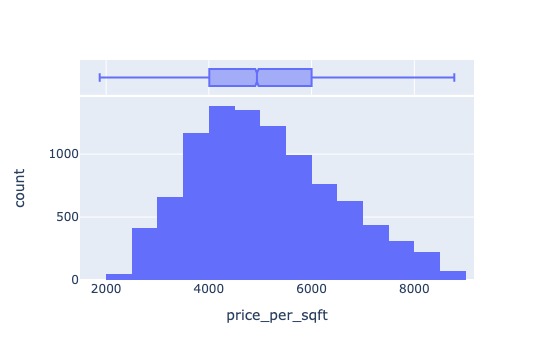

In [38]:
fig2 = px.histogram(df12, x='price_per_sqft', nbins = 20, marginal = 'box')
fig2

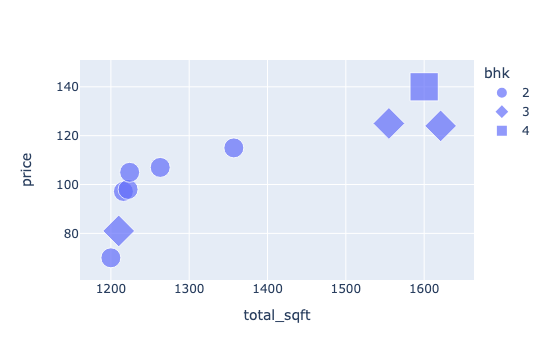

In [39]:
fig3 = px.scatter(df12[df12['location']=='Rajaji Nagar'], x='total_sqft', y='price', symbol = 'bhk', size = 'bhk')
fig3

In [40]:
# fig3 = px.scatter(df14[df14['location']=='Narayanapura'], x='total_sqft', y='price', symbol = 'bhk', size = 'bhk')
# fig3

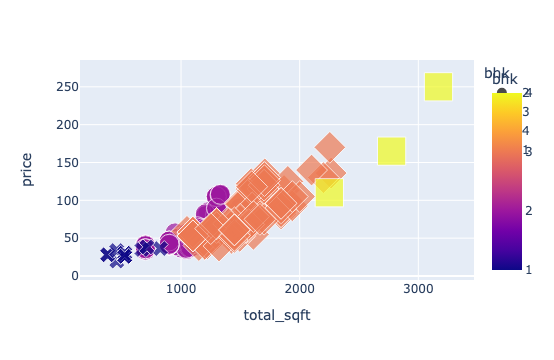

In [41]:
fig3 = px.scatter(df12[df12['location']=='Kanakpura Road'], x='total_sqft', y='price', symbol = 'bhk', size = 'bhk', color = 'bhk')
fig3

In [42]:
# fig3 = px.scatter(df14[df14['location']=='Kanakpura Road'], x='total_sqft', y='price', symbol = 'bhk', size = 'bhk', color = 'bhk')
# fig3

In [43]:
df13 = df12.copy()

In [44]:
location = df13.groupby('location').size().sort_values(ascending = False).reset_index(name='count')
others = location[location['count'] <= 9]['location']
others

192              Binny Pete
193      Basaveshwara Nagar
194             BEML Layout
195         KUDLU MAIN ROAD
196            Indira Nagar
               ...         
964          K R C kothanur
965               Jogupalya
966    Jnanabharathi Layout
967           Jayanti Nagar
968              whitefiled
Name: location, Length: 777, dtype: object

In [45]:
df13.loc[df13['location'].isin(others), 'location'] = 'other'

In [46]:
df13['location'].value_counts()

other                 1962
Whitefield             399
Sarjapur  Road         293
Electronic City        290
Kanakpura Road         249
                      ... 
Neeladri Nagar          10
Narayanapura            10
Ambedkar Nagar          10
6th Phase JP Nagar      10
Basapura                10
Name: location, Length: 193, dtype: int64

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'median': np.median(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['median'])].index.values)
    return df.drop(exclude_indices,axis='index')
df14 = remove_bhk_outliers(df13)
df14

,location,total_sqft,bath,balcony,price,bhk,total_sqft_per_br,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,528.000000,3699.81
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,480.000000,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,507.000000,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2,600.000000,4250.00
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,500.000000,3800.00
...,...,...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,1.0,57.00,3,448.333333,4237.92
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,571.666667,6530.61
13315,Whitefield,3453.0,4.0,0.0,231.00,5,690.600000,6689.83
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,570.500000,5258.55


In [48]:
location_encoder = LabelEncoder()

df14['location_encoded'] = location_encoder.fit_transform(df14['location'])
df14

,location,total_sqft,bath,balcony,price,bhk,total_sqft_per_br,price_per_sqft,location_encoded
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,528.000000,3699.81,60
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,480.000000,4305.56,179
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,507.000000,6245.89,127
4,Kothanur,1200.0,2.0,1.0,51.00,2,600.000000,4250.00,120
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,500.000000,3800.00,4
...,...,...,...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,1.0,57.00,3,448.333333,4237.92,179
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,571.666667,6530.61,66
13315,Whitefield,3453.0,4.0,0.0,231.00,5,690.600000,6689.83,186
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,570.500000,5258.55,155


In [49]:
df14[df14['location'] == 'Kothanur']

,location,total_sqft,bath,balcony,price,bhk,total_sqft_per_br,price_per_sqft,location_encoded
4,Kothanur,1200.0,2.0,1.0,51.0,2,600.000000,4250.00,120
102,Kothanur,2400.0,2.0,1.0,150.0,3,800.000000,6250.00,120
196,Kothanur,1186.0,2.0,2.0,58.0,2,593.000000,4890.39,120
304,Kothanur,1847.0,3.0,2.0,105.0,3,615.666667,5684.89,120
2181,Kothanur,1140.0,4.0,1.0,90.0,4,285.000000,7894.74,120
2472,Kothanur,1187.0,2.0,2.0,58.0,2,593.500000,4886.27,120
2673,Kothanur,1847.0,3.0,2.0,110.0,3,615.666667,5955.60,120
3876,Kothanur,1185.0,2.0,2.0,59.0,2,592.500000,4978.90,120
4401,Kothanur,1790.0,3.0,2.0,105.0,3,596.666667,5865.92,120
4978,Kothanur,1070.0,2.0,1.0,45.5,2,535.000000,4252.34,120


In [50]:
# dummies = pd.get_dummies(df10.location)
# dummies.head(3)

In [51]:
# df11 = pd.concat([df10,dummies.drop('other',axis=1)],axis=1)
# df11.head()

In [52]:
# df12 = df11.drop(['location', 'total_sqft_per_br', 'price_per_sqft'],axis=1)
# df12

In [80]:
location = df14['location'].unique().tolist()

In [82]:
location_df = pd.DataFrame(location, columns=['location'])
location_df.to_csv('/Users/gaurav/PycharmProjects/House_Price_Prediction/location.csv', index=False)

In [53]:
X = df14.drop(['location', 'total_sqft_per_br', 'price_per_sqft', 'price'],axis=1)
y = df14['price']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8409040828318468

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)

cross_val_score(RandomForestRegressor(), X, y, cv=cv)

array([0.82514174, 0.82049283, 0.83015798, 0.83107141, 0.83868502])

In [57]:
def predict_price(location,sqft,bath,bhk,balcony):
    loc_index = np.where(X.columns==location)[0][0]
    print(loc_index)
    x= np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1
        
    return model.predict([x])[0]
    

In [86]:
encoded_location = location_encoder.transform(['Kothanur'])[0]

input_data = pd.DataFrame({
    'total_sqft': [1700],
    'bath': [2],
    'balcony': [2],
    'bhk': [2],
    'location_encoded': [encoded_location]
})

In [87]:
predicted_price = model.predict(input_data)[0]

In [88]:
predicted_price

107.65602380952379

In [61]:
with open('location_encoder.pkl', 'wb') as file:
    pickle.dump(location_encoder, file)

In [62]:
with open ('home_price_model.pkl','wb') as file:
    pickle.dump(model, file)

In [66]:
with open('/Users/gaurav/PycharmProjects/House_Price_Prediction/location_encoder.pkl', 'rb') as file:
    location_encoder = pickle.load(file)

In [67]:
location_encoder

LabelEncoder()

In [68]:
with open('/Users/gaurav/PycharmProjects/House_Price_Prediction/home_price_model.pkl', 'rb') as file:
     model = pickle.load(file)

In [70]:
model

RandomForestRegressor()

In [71]:
print(sklearn.__version__)

1.4.1.post1
